<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/reservoir/compositiongrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Compositional gradient in a gas reservoir
#@markdown This notebook discuss compositional gradients in a gas reservoir
%%capture
!pip install git+https://github.com/Equinor/neqsim-python.git
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

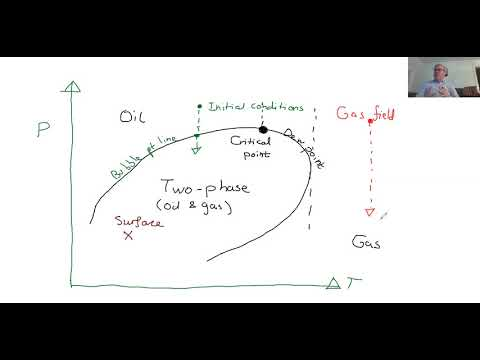

In [ ]:
#@title  Composition gradients in reservoirs
#@markdown Why compositional gradients?
from IPython.display import YouTubeVideo
YouTubeVideo('K05k9uGapFs', width=600, height=400)

# Calculation of composition gradient with NeqSim

In [6]:
# Creating a fluid in neqsim

pressure = 150.0
temperature = 100.0
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 0.99)
fluid1.addComponent('n-heptane', 0.01)
fluid1.setTemperature(temperature, "C")
fluid1.setPressure(pressure, "bara")
dewpointtemperature = dewt(fluid1)
printFrame(fluid1)

newFluid = TPgradientFlash(fluid1, height = 1000.0, temperature=dewpointtemperature+1.0).phaseToSystem(0)

printFrame(newFluid)

| 0                    | 1          | 2                 | 3                 | 4   | 5   | 6               |
|:---------------------|:-----------|:------------------|:------------------|:----|:----|:----------------|
|                      | total      | GAS               | OIL               |     |     |                 |
| methane              | 9.9E-1     | 9.9E-1            | 9.9E-1            |     |     | [mole fraction] |
| n-heptane            | 1E-2       | 1E-2              | 1.00001E-2        |     |     | [mole fraction] |
|                      |            |                   |                   |     |     |                 |
| Density              |            | 8.68499E1         | 8.685E1           |     |     | kg/m3           |
| Phase Fraction       |            | 1E0               | 1E-15             |     |     | [mole fraction] |
| Molar Mass           | 1.68846E-2 | 1.68846E-2        | 1.68846E-2        |     |     | kg/mol          |
| Z factor             |    

# Calculation composition gradient in a gas reservoir with hydrogen

In [ ]:
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.setTemperature(70.0, "C")
fluid1.setPressure(100.0, "bara")
fluid1.addComponent("hydrogen", 1.0, "mol/sec")
fluid1.addComponent("CO2", 1.0, "mol/sec")
fluid1.addComponent("methane", 96.0, "mol/sec")
fluid1.addComponent("ethane", 1.0, "mol/sec")
fluid1.addComponent("propane", 1.0, "mol/sec")
fluid1.setMixingRule("classic")  # classic will use binary kij
# True if more than two phases could be present
TPflash(fluid1)

depth = []
x_hydrogen = []
x_propane = []

for i in range(100):


deep_fluid = TPgradientFlash(fluid1, 1000.0, 273.15+70.0+10.0)
assert deep_fluid.getComponent('CO2').getx() == 0.010905853658496048